In [1]:
cd ..

/Users/joshuacook/src/src/PCA-tutorial


In [2]:
import numpy as np
import pandas as pd
import scipy.linalg as sla
import matplotlib.pyplot as plt
from preamble import draw_vector, initialize_2d_plot
%matplotlib inline

**Note** I will be using pandas for holding matrices because this conveniently allows us to index column vectors easily.

### The Identity Matrix

In [3]:
I_2 = pd.DataFrame(np.eye(2))

In [4]:
I_2

,0,1
0,1.0,0.0
1,0.0,1.0


### Plot the column vectors of the 2-D Identity, $I$

(-2, 2)

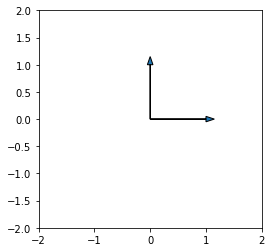

In [5]:
plt.figure(figsize=(4,4))
plt.arrow(0, 0, 1, 0, lw=1, head_width=.1)
plt.arrow(0, 0, 0, 1, lw=1, head_width=.1)
plt.xlim(-2,2)
plt.ylim(-2,2)

### What are the column vectors of the 2-D Identity in terms of Analytic Geometry?

Note also that the column vector of $I$ are orthogonal.

Recall that the dot product between two vectors can be defined in terms of the cosine of the angle between them.

$$\mathbf{u}^T\mathbf{v} = u\cdot v\cdot \cos \theta$$

If two vectors are orthogonal (perpendicular) then the angle between them will be 90° and and the cosine of the angle between them is zero. 

Therefore, two vectors are orthogonal if and only if  their dot product is zero.

In [ ]:
I_2[0].dot(I_2[1])

## Matrix Decomposition

A decomposition is the breaking of a matrix into a series of matrix multiplications. 

A very canonical decomposition is the QR factorization where $Q$ is an orthogonal matrix and $R$ is an upper triangular matrix. Thus we might have a matrix $X$ and we seek 

$$X=QR$$

In [6]:
W = np.random.rand(4).reshape(2,2)
X = pd.DataFrame(W.T.dot(W))
X

,0,1
0,1.076177,0.627053
1,0.627053,0.790518


**Advanced Note** We create a new random matrix $W$, then define $X$ to be $W^TW$. In doing so, $X$ is 

1. symmetric
2. positive definite

This second point guarantees that we will have real (as opposed to complex) eigenvalues at the end of this notebook.

In [7]:
Q, R = sla.qr(X)
Q, R = pd.DataFrame(Q), pd.DataFrame(R)
display(Q)
display(R)

,0,1
0,-0.864030,-0.503441
1,-0.503441,0.864030


,0,1
0,-1.245533,-0.939771
1,0.000000,0.367347


### $Q$ is orthogonal

In [8]:
Q[0].dot(Q[1])

0.0

In [9]:
Q.dot(R)

,0,1
0,1.076177,0.627053
1,0.627053,0.790518


In [10]:
X

,0,1
0,1.076177,0.627053
1,0.627053,0.790518


### $PLU$ Decomposition

In [11]:
P, L, U = sla.lu(X)
P, L, U = pd.DataFrame(P), pd.DataFrame(L), pd.DataFrame(U)
display(P)
display(L)
display(U)

,0,1
0,1.0,0.0
1,0.0,1.0


,0,1
0,1.000000,0.0
1,0.582667,1.0


,0,1
0,1.076177,0.627053
1,0.000000,0.425156


In [12]:
P.dot(L).dot(U)

,0,1
0,1.076177,0.627053
1,0.627053,0.790518


In [13]:
X

,0,1
0,1.076177,0.627053
1,0.627053,0.790518


### Eigendecomposition

An eigendecomposition is a special kind of decomposition in which a matrix is decomposed into eigenvectors and eigenvalues which describe the essential nature of the matrix. 

"eigen" is German meaning "own", "self", or "essential". 

Under an eigendecomposition, a matrix is decomposed so that

$$X = V\Lambda V^T$$

where $V$ is a matrix of eigenvectors and $\Lambda$ is a diagonal matrix with corresponding eigenvalues on the diagonal.

The matrix $V$ is

$$ V=
\left(\begin{matrix}
\mathbf{v}_1 \dots \mathbf{v}_n 
\end{matrix}\right)
$$

where each $\mathbf{v}_i$ is a column-oriented eigenvector.

### The Eigen Equation

An eigenvector and corresponding eigenvalue are described by the following equation.

$$X\mathbf{v} = \lambda \mathbf{v}$$

In [14]:
eig_vals, eig_vecs = np.linalg.eig(X)

In general, 

$$V V^T \neq I$$

In general,

$$V V^{-1} = I$$
if $V^{-1}$ exists

In [15]:
Lambda = pd.DataFrame(np.diag(eig_vals))
V = pd.DataFrame(eig_vecs)
display(Lambda)
display(V)

,0,1
0,1.576461,0.000000
1,0.000000,0.290234


,0,1
0,0.781694,-0.623662
1,0.623662,0.781694


In [16]:
V.dot(Lambda).dot(V.T)

,0,1
0,1.076177,0.627053
1,0.627053,0.790518


In [17]:
X

,0,1
0,1.076177,0.627053
1,0.627053,0.790518


### The Eigen Equation

$$X\mathbf{v} = \lambda \mathbf{v}$$

What this means is that multiplying a matrix by one of its eigenvectors gives a scalar multiple of that eigenvector. **The direction doesn't change!!**

In [18]:
V[0]

0    0.781694
1    0.623662
Name: 0, dtype: float64

In [19]:
X.dot(V[0])

0    1.23231
1    0.98318
dtype: float64

In [20]:
Lambda[0][0]*V[0]

0    1.23231
1    0.98318
Name: 0, dtype: float64

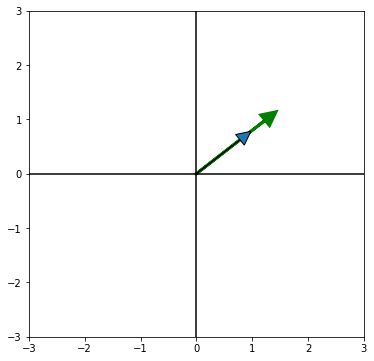

In [21]:
initialize_2d_plot(-3,3,-3,3)
draw_vector(X.dot(V[0]), kwargs={'color':'green', 'linewidth':3})
draw_vector(V[0])

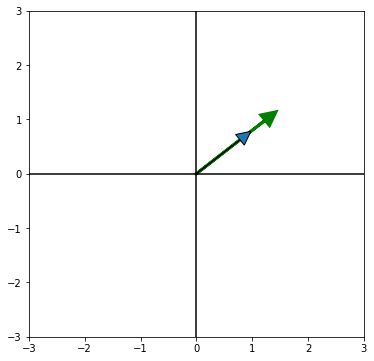

In [22]:
initialize_2d_plot(-3,3,-3,3)
draw_vector(Lambda[0][0]*V[0], kwargs={'color':'green', 'linewidth':3})
draw_vector(V[0])